# MLB Scores

In [218]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import Ridge, LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor 

### Load the Data Set into Pandas
Import the csv files into Pandas Data Frame

Data retrieved from: https://github.com/fivethirtyeight/data/tree/master/mlb-elo

In [219]:
title = "                                         MLB.csv"                              
print(title)
data_raw = pd.read_csv("mlb_elo.csv")
data_raw.head()

                                         MLB.csv


,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2020-10-10,2020,1,d,LAD,SDP,1598.290926,1525.832831,0.635558,0.364442,...,NaN,NaN,NaN,NaN,0.620261,0.379739,NaN,NaN,NaN,NaN
1,2020-10-10,2020,1,d,ATL,FLA,1543.508397,1482.006574,0.615867,0.384133,...,NaN,NaN,NaN,NaN,0.608742,0.391258,NaN,NaN,NaN,NaN
2,2020-10-09,2020,1,d,SDP,LAD,1525.832831,1598.290926,0.364442,0.635558,...,NaN,NaN,NaN,NaN,0.379739,0.620261,NaN,NaN,NaN,NaN
3,2020-10-09,2020,1,d,TBD,NYY,1566.075394,1557.931446,0.515622,0.484378,...,NaN,NaN,NaN,NaN,0.507634,0.492366,NaN,NaN,NaN,NaN
4,2020-10-09,2020,1,d,OAK,HOU,1547.618027,1542.711978,0.509413,0.490587,...,NaN,NaN,NaN,NaN,0.477541,0.522459,NaN,NaN,NaN,NaN


## Exploratory Data Analysis: 

### (1) NaN value Check
Clean all NaN value from Player coulums and re-organize the data frame.

Our goal is to build a regression model eventually and this missing data is useless to us.

In [220]:
data = data_raw.dropna()
data.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
20,2020-10-02,2020,0,c,SDP,STL,1522.312734,1520.100045,0.550128,0.449872,...,47.400000,57.310588,-17.746023,29.444071,0.461857,0.538143,1534.038131,1509.745224,4.0,0.0
21,2020-10-02,2020,0,c,CHC,FLA,1517.011886,1478.403936,0.617874,0.382126,...,60.622663,50.317526,40.641459,5.064633,0.673112,0.326888,1517.959644,1475.108982,0.0,2.0
22,2020-10-01,2020,0,c,LAD,MIL,1596.678175,1502.693145,0.712092,0.287908,...,56.674581,57.809816,21.716845,33.175306,0.673916,0.326084,1606.065971,1506.703444,3.0,0.0
23,2020-10-01,2020,0,c,SDP,STL,1519.722828,1522.689951,0.540271,0.459729,...,52.966274,52.749116,7.282398,7.517466,0.544395,0.455605,1530.728125,1513.055229,11.0,9.0
24,2020-10-01,2020,0,c,OAK,CHW,1545.674260,1507.785767,0.616569,0.383431,...,50.478180,49.661565,-1.921507,-6.888932,0.558056,0.441944,1532.981409,1513.624593,6.0,4.0


Let's double check if there's still any NaN in the data frame. If data.isnull( ).sum( ) == 0 which means there's no missing data in the data frame

In [221]:
data.isnull().sum()

date            0
season          0
neutral         0
playoff         0
team1           0
team2           0
elo1_pre        0
elo2_pre        0
elo_prob1       0
elo_prob2       0
elo1_post       0
elo2_post       0
rating1_pre     0
rating2_pre     0
pitcher1        0
pitcher2        0
pitcher1_rgs    0
pitcher2_rgs    0
pitcher1_adj    0
pitcher2_adj    0
rating_prob1    0
rating_prob2    0
rating1_post    0
rating2_post    0
score1          0
score2          0
dtype: int64

### (2) Visualization

I am a baseball fan so I wonder who is the starting pitcher the most often because usually the starting pitcher affects the win rate a lot and more often a player plays as a starting pitcher, it means how great he is.

Wordcloud uses the visulaization of the word frequency to illustrate it pretty well in this case.

In [222]:
#data size check
data['pitcher1'].size 

1580

It seems like Pettite and Andy are starting pitchers most often for Home teams.

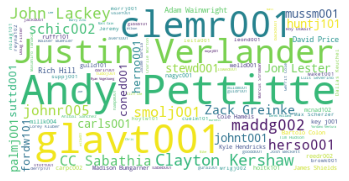

In [223]:
text = data['pitcher1']
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

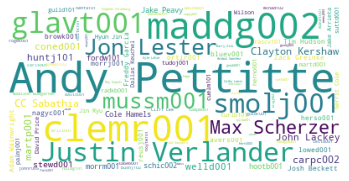

In [241]:
text = data['pitcher2']
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Pettitte and Andy also play as starting pitchers the most often even as Away team so we could see how good they are 

## Build Regrssion Model

Not only it's the project requirement, but regression models is really suitable for sport related problem.


### (1) Linear Regression Model 
pitcher1_rgs
We gunna use elo1_pre, elo2_pre, elo_prob1, elo_prob2, pitcher1_rgs, pitcher2_rgs, and neutral as features to predict the scores for each teams. 

elo1_pre: Home team's Elo rating before the game

elo2_pre: Away team's Elo rating before the game

elo_prob1: Home team's probability of winning according to Elo ratings

elo_prob2: Away team's probability of winning according to Elo ratings

neutral: Whether game was on a neutral site

In [224]:
#data = data.head(1580)
x = data[['elo1_pre','elo2_pre','elo_prob1','elo_prob2','pitcher1_rgs', 'pitcher2_rgs']]
y = data[['score1', 'score2']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [225]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [226]:
Linear_model = linear_model.LinearRegression()
Linear_model.fit(x_train, y_train)

LinearRegression()

Let's predict the accuracy of our Linear regression model.

In [227]:
y_predict = Linear_model.predict(x_test)
r2_score(y_test,y_predict)

0.009647550707903185

The predicition accuracy is around 0.9%. Since the model relationship between dependent and independent variables, Linear regression is not very accurate. However, 0.9% accuray is way too low to be applied so I would use Neutral Network which should have a better prediction performance.

### (2) Neutral Network
Let's repeat the same process as above. I would train the model first and predict its accuracy.

In [230]:
Neutral_model = MLPRegressor()
Neutral_model.fit(x_train, y_train)

MLPRegressor()

In [231]:
y_predict = Neutral_model.predict(x_test)
result = abs(r2_score(y_test,y_predict))
#r2_score(y_test,y_predict)
result

0.05739743289241617

For Neutral Network, the accuracy improves to 5% which is still a low accurate rate theoretically. But in reality, I think it is accpetable. Considering we predict the score for each team based on elo_prob1, elo_prob2, elo1_post, elo2_post, neutral, pitcher1, and pitcher2, the accuracy makes sense. Except all the variables we use to predict above, there are still hundreds of variables we haven't included yet such as, weather, temperature, physical conditions of players, whether players make mistakes in the game or not etc.

Hence, let's use Neutral Network to build a function to determine the scores for each team.

In [233]:
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor1.fit(x, y)
pred = regressor1.predict(x_test)
print(metrics.r2_score(y_test, pred))

0.8539656890134684


In [240]:
P_Score = pd.DataFrame({'P_Score1': pred1[:, 0], 'P_Score2': pred1[:, 1]})
#Only shows first 5 elements or it's too messy 
P_Score.head()

,P_Score1,P_Score2
0,3.24,4.12
1,4.40,3.93
2,6.10,6.27
3,5.63,5.33
4,2.84,4.17


In [235]:
data.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
20,2020-10-02,2020,0,c,SDP,STL,1522.312734,1520.100045,0.550128,0.449872,...,47.400000,57.310588,-17.746023,29.444071,0.461857,0.538143,1534.038131,1509.745224,4.0,0.0
21,2020-10-02,2020,0,c,CHC,FLA,1517.011886,1478.403936,0.617874,0.382126,...,60.622663,50.317526,40.641459,5.064633,0.673112,0.326888,1517.959644,1475.108982,0.0,2.0
22,2020-10-01,2020,0,c,LAD,MIL,1596.678175,1502.693145,0.712092,0.287908,...,56.674581,57.809816,21.716845,33.175306,0.673916,0.326084,1606.065971,1506.703444,3.0,0.0
23,2020-10-01,2020,0,c,SDP,STL,1519.722828,1522.689951,0.540271,0.459729,...,52.966274,52.749116,7.282398,7.517466,0.544395,0.455605,1530.728125,1513.055229,11.0,9.0
24,2020-10-01,2020,0,c,OAK,CHW,1545.674260,1507.785767,0.616569,0.383431,...,50.478180,49.661565,-1.921507,-6.888932,0.558056,0.441944,1532.981409,1513.624593,6.0,4.0


In [236]:
def score (team1, team2): 

    df = P_Score[(P_Score['team1'] == team1) & (P_Score['team2'] == team2)]

    print(team1, "'s predictive socre is : ", df[['predscore_1']])
    print(team2, "'s predictive socre is : ", df[['predscore_2']])

In [237]:
score('OAK', 'CHW')

OKA's score is 6.2
CHW's score is 4.5


In [238]:
score('SDP', 'STL')

SDP's score is 11.8
STL's score is 9.1


## In Conclussion 

I build a Linear Regression model at first, but its accuracy is way too low to be applied. Then instead of Linear Regression, I start building Neutral Network regression model for a better predictive performance. For using Neutral Network, it ends up with 5% predictive accuracy. Considering the reality and many variables not included yet, the accuracy is acceptable to me.

For score() function, if you pass Home team's name and Away team's name to the function, it would return a predictive scores for each team. For example, score('SDP', 'STL') would return SDP's score is 11.8 and STL's score is 9.1. 